# Rio_Grande Crossing: El_Salvador
- Four SSP Scenarios
- Saving output DF and Graphs

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Imputting libraries
from sklearn.linear_model import LinearRegression

# Saving Model Summaries
import statsmodels.api as sm

# Formatting printing and floats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# Parsing into a dataframe
wide_df = pd.read_csv('INPUTS_OUTPUTS_NEW_VARIABLES_ML/INPUT_DATA_SCRIPT_ML/El_Salvador/ELSAL_USA_FINAL_VARS.csv')

# Dropping columns
cols_out = ['CSV', 'Country', 'New_Data_Type']
wide_df = wide_df.drop(cols_out, axis=1).copy()

# Cleaning/parsing
wide_df.iloc[:, 4:] = wide_df.iloc[:, 4:].replace(0, np.nan)  # Replacing all 0 values with NaN values
wide_df.iloc[:, 4:] = wide_df.iloc[:, 4:].astype(float)       # Data type to float 

In [2]:
wide_df

,Type_of_Variable,Country_Code,Variable,Unit_of_Measure,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,TRAC,ELSAL,ELSAL_Rio_Grande,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1228.00,5730.00,4948.00,6338.00,7334.00,17187.00,33307.00,57520.00,45047.00,70155.00,21401.00,26406.00,54364.00,12393.00,86657.00,32134.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAC,ELSAL,ELSAL_Tucson,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.00,2486.00,2511.00,2795.00,1401.00,1686.00,1424.00,1089.00,1356.00,1773.00,700.00,972.00,1932.00,1170.00,2679.00,973.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAC,ELSAL,ELSAL_San_Diego,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00,361.00,285.00,232.00,216.00,235.00,255.00,289.00,293.00,1061.00,919.00,1931.00,2434.00,582.00,1652.00,470.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SSP SCENARIO,ELSAL,ELSAL_SSP119_avg_temp,Degrees Celsius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.96,26.64,26.46,25.57,24.87,25.36,25.93,26.37,25.54,25.20,25.86,25.67,25.82,25.95,25.59,26.58,26.50,25.66,25.68,26.14,26.87,25.69,25.80,25.93,26.75,25.95,26.20,26.04,26.08,25.98,25.92,26.14,25.93,25.93,25.80,26.28,26.93,26.12,26.38,26.30,25.62,25.30,26.13,26.50,25.71,26.07,26.28,26.07,25.66,25.27,25.65,25.61,25.85,25.62,25.79,26.43,25.90,25.42,26.29,26.12,25.19,26.03,25.88,25.36,26.42,25.84,26.03,26.03,26.11,25.67,25.49,25.57,25.64,25.17,25.53,26.00,25.70,25.79,25.31,26.75,25.74,25.84,25.34,25.58,25.78,26.13
4,SSP SCENARIO,ELSAL,ELSAL_SSP245_avg_temp,Degrees Celsius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.08,26.25,26.28,26.78,26.08,25.34,25.79,25.99,26.58,26.99,26.63,26.50,26.41,26.12,26.30,26.32,26.35,25.75,25.59,25.97,26.01,26.29,26.48,26.34,26.20,26.60,26.09,25.96,26.51,26.44,2

In [3]:
# Function to parse data into numeric

def prepare_data(df, year_columns):
    df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')
    return df

# # Function to impute data with OLS

def impute_with_ols(df, train_start_year, train_end_year):
    # Defining columns
    year_columns = [str(year) for year in range(train_start_year, train_end_year + 1)]
    # Imputting data
    for index, row in df.iterrows():
        # Fitting the model only on available data
        available_data = row[year_columns].dropna()
        if len(available_data) < 2:
            continue  # Need at least two data points to fit a line
        
        # Determining imputation method for each variable
        impute_method = {}
        for col in available_data.index:
            if col in ['GDP (current US$)', 'GDP per capita (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']:
                impute_method[col] = 'mean'
            else:
                impute_method[col] = 'median'

        # Setting variables for OLS
        X_train = np.array(list(map(int, available_data.index))).reshape(-1, 1)
        y_train = available_data.values
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predicting missing values
        missing_years = row[year_columns][row[year_columns].isna()].index
        if missing_years.empty:
            continue
        X_missing = np.array(list(map(int, missing_years))).reshape(-1, 1)
        predicted_values = model.predict(X_missing)
        
        # Filling missing values in the DataFrame using the appropriate imputation method
        for col in missing_years:
            if col in impute_method:
                if impute_method[col] == 'mean':
                    df.loc[index, col] = row[year_columns].mean()
                elif impute_method[col] == 'median':
                    df.loc[index, col] = row[year_columns].median()

    return df


# Converting year columns to numeric: 1960 - 2100

year_columns = [str(year) for year in range(1960, 2100)]
wide_df = prepare_data(wide_df, year_columns)

In [4]:
wide_df.tail()

,Type_of_Variable,Country_Code,Variable,Unit_of_Measure,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
24,POPULATION VARIABLE,USA,Prevalence of undernourishment (% of population),Share of Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3528128.93,3230717.55,2926099.15,2614705.59,2626639.62,2320580.58,2324220.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,POPULATION VARIABLE,USA,Corruption,Counts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15700.00,16200.00,15900.00,15900.00,15967.00,14765.00,13497.00,9393.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,POPULATION VARIABLE,USA,Government Effectiveness: Estimate,Rate (0 to 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.52,NaN,1.70,NaN,1.72,NaN,1.62,1.54,1.74,1.53,1.58,1.64,1.61,1.50,1.55,1.51,1.52,1.52,1.46,1.43,1.44,1.52,1.54,1.45,1.28,1.30,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,ECONOMIC VARIABLE,USA,GDP (current US$),USD,543000000000.00,563000000000.00,605000000000.00,639000000000.00,686000000000.00,744000000000.00,815000000000.00,862000000000.00,943000000000.00,1020000000000.00,1070000000000.00,1160000000000.00,1280000000000.00,1430000000000.00,1550000000000.00,1680000000000.00,1870000000000.00,2080000000000.00,2350000000000.00,2630000000000.00,2860000000000.00,3210000000000.00,3340000000000.00,3630000000000.00,4040000000000.00,4340000000000.00,4580000000000.00,4860000000000.00,5240000000000.00,5640000000000.00,5960000000000.00,6160000000000.00,6520000000000.00,6860000000000.00,7290000000000.00,7640000000000.00,8070000000000.00,8580000000000.00,9060000000000.00,9630000000000.00,10300000000000.00,10600000000000.00,10900000000000.00,11500000000000.00,12200000000000.00,13000000000000.00,13800000000000.00,14500000000000.00,14800000000000.00,14500000000000.00,15000000000000.00,15600000000000.00,16300000000000.00,16800000000000.00,17600000000000.00,18200000000000.00,18700000000000.00,19500000000000.00,20500000000000.00,21400000000000.00,21100000000000.00,23300000000000.00,25400000000000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
# OLS : 2015 TO 2022

# Perform imputation with OLS for specified years
wide_df_processed_data_ols = impute_with_ols(wide_df, 2015, 2022)
wide_df_processed_data_ols = wide_df_processed_data_ols

# Dropping columns
years_to_drop = [str(year) for year in range(1960, 2015)]
wide_df_processed_data_ols = wide_df_processed_data_ols.drop(columns=years_to_drop)
# wide_df_processed_data_ols.head()

In [6]:
# Function to parse data into numeric

def convert_to_numeric(df):
    for col in df.columns:
        try:
            # Force convert to float and handle exceptions
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError as e:
            # Log columns that could not be converted, with error message
            print(f"Column {col} cannot be converted to numeric: {e}")
        except Exception as e:
            # Log unexpected exceptions
            print(f"Unexpected error with column {col}: {e}")
    return df

# Function for Linear Interpolation

def linear_interpolation2(df, start_year, end_year):
    # Create a list of year columns
    year_columns = [str(year) for year in range(start_year, end_year + 1)]
    # Filter out columns that are not in the year range
    year_columns = [col for col in year_columns if col in df.columns]

    # Convert all potential year columns to numeric
    df[year_columns] = convert_to_numeric(df[year_columns])

    # Apply linear interpolation to only the year columns
    df[year_columns] = df[year_columns].interpolate(method='linear', axis=1, limit_direction='both')

    return df

# Calling function with specified years

wide_df_processed_data_ols = linear_interpolation2(wide_df_processed_data_ols, 1960, 2022)
# wide_df_processed_data_ols

/var/folders/n9/h_xmdzn54836zt3_ch46ywdm0000gn/T/ipykernel_11122/4089097305.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='raise')


In [7]:
# wide_df_processed_data_ols['Type__of_Variable'][7:]

In [8]:
# Melting the dataframe

long_df = pd.melt(wide_df_processed_data_ols, id_vars=['Country_Code', 'Variable', 
                                                       'Unit_of_Measure', 'Type_of_Variable'],
                                                         var_name='Year', value_name='Value')

# Printing melted dataframe 
long_df['Year'] = long_df['Year'].astype(int) 
long_df_22to100 = long_df[long_df['Year'] >= 2021]

In [9]:
long_df.head(100)

,Country_Code,Variable,Unit_of_Measure,Type_of_Variable,Year,Value
0,ELSAL,ELSAL_Rio_Grande,Person,TRAC,2015,45047.00
1,ELSAL,ELSAL_Tucson,Person,TRAC,2015,1356.00
2,ELSAL,ELSAL_San_Diego,Person,TRAC,2015,293.00
3,ELSAL,ELSAL_SSP119_avg_temp,Degrees Celsius,SSP SCENARIO,2015,24.96
4,ELSAL,ELSAL_SSP245_avg_temp,Degrees Celsius,SSP SCENARIO,2015,25.08
5,ELSAL,ELSAL_SSP370_avg_temp,Degrees Celsius,SSP SCENARIO,2015,25.07
6,ELSAL,ELSAL_SSP585_avg_temp,Degrees Celsius,SSP SCENARIO,2015,25.32
7,ELSAL,"Population, total",Person,POPULATION VARIABLE,2015,6231066.00
8,ELSAL,Rural population (% of total population),Share of Population,POPULATION VARIABLE,2015,1888013.00
9,ELSAL,Population ages 15-64 (% of total population),Share of Population,POPULATION VARIABLE,2015,4005563.50


In [10]:
# Libraries

import statsmodels.api as sm
# from sklearn.datasets import load_iris 
from math import log
import statsmodels.api as sm
# from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Filter data for temperature projections and historical data

# Historical Data from 1960 to 2022
historical_data = long_df[long_df['Year'] <= 2022]
# Predicted Data from 2022 to 2100
predicted_data = long_df[long_df['Year'] >= 2023]

In [11]:
##################################################################

# Scenario 1: ELSAL_SSP119_avg_temp
# features_1960_2022_ssp119

# Creating a dataframe 'features_1960_2022_ssp119' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'ELSAL_SSP119_avg_temp'
ELSAL_features_1960_2022_ssp119 = historical_data[historical_data['Variable'] == 'ELSAL_SSP119_avg_temp'] 
ELSAL_features_1960_2022_ssp119 = ELSAL_features_1960_2022_ssp119[['Year', 'Value']]                            
ELSAL_features_1960_2022_ssp119 = ELSAL_features_1960_2022_ssp119.rename(columns={'Value': 'Temperature'})      

##################################################################

# Scenario 2: ELSAL_SSP245_avg_temp
# features_1960_2022_ssp245

# Creating a dataframe 'features_1960_2022_ssp245' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'ELSAL_SSP245_avg_temp'
ELSAL_features_1960_2022_ssp245 = historical_data[historical_data['Variable'] == 'ELSAL_SSP245_avg_temp'] 
ELSAL_features_1960_2022_ssp245 = ELSAL_features_1960_2022_ssp245[['Year', 'Value']]                            
ELSAL_features_1960_2022_ssp245 = ELSAL_features_1960_2022_ssp245.rename(columns={'Value': 'Temperature'})      

##################################################################

# Scenario 3: ELSAL_SSP370_avg_temp
# features_1960_2022_ssp370

# Creating a dataframe 'features_1960_2022_ssp370' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'ELSAL_SSP245_avg_temp'
ELSAL_features_1960_2022_ssp370 = historical_data[historical_data['Variable'] == 'ELSAL_SSP370_avg_temp'] 
ELSAL_features_1960_2022_ssp370 = ELSAL_features_1960_2022_ssp370[['Year', 'Value']]                            
ELSAL_features_1960_2022_ssp370 = ELSAL_features_1960_2022_ssp370.rename(columns={'Value': 'Temperature'})      

##################################################################

# Scenario 4: ELSAL_SSP585_avg_temp
# features_1960_2022_ssp585

# Creating a dataframe 'features_1960_2022_ssp585' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'ELSAL_SSP585_avg_temp'
ELSAL_features_1960_2022_ssp585 = historical_data[historical_data['Variable'] == 'ELSAL_SSP585_avg_temp'] 
ELSAL_features_1960_2022_ssp585 = ELSAL_features_1960_2022_ssp585[['Year', 'Value']]                            
ELSAL_features_1960_2022_ssp585 = ELSAL_features_1960_2022_ssp585.rename(columns={'Value': 'Temperature'})      

##################################################################

# Additional Variables to all models
# additional_variables: not considering SSP and TRAC data: X
additional_variables = [
    'Population, total',
    'Rural population (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Victims of intentional homicide',
    'Prevalence of severe food insecurity in the population (%)',
    'Prevalence of undernourishment (% of population)',
    'Corruption',
    'Government Effectiveness: Estimate',
    'GDP (current US$)',
    'GDP per capita (current US$)'
]
    
##################################################################

##################################################################

# Scenario 1: _SSP119_avg_temp
# features_1960_2022_ssp119
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    ELSAL_features_1960_2022_ssp119 = pd.merge(ELSAL_features_1960_2022_ssp119, var_data, on='Year', how='outer') 
    
# features_1960_2022_ssp119.tail() 
##################################################################

# Scenario 2: _SSP245_avg_temp
# features_1960_2022_ssp245
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    ELSAL_features_1960_2022_ssp245 = pd.merge(ELSAL_features_1960_2022_ssp245, var_data, on='Year', how='outer') #CHANGE!!!!!!!!!!!
    
# features_1960_2022_ssp245.tail() 
##################################################################

# Scenario 3: _SSP370_avg_temp
# features_1960_2022_ssp370
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    ELSAL_features_1960_2022_ssp370 = pd.merge(ELSAL_features_1960_2022_ssp370, var_data, on='Year', how='outer') #CHANGE!!!!!!!!!!!
    
# features_1960_2022_ssp370.tail() 
##################################################################

# Scenario 4: _SSP585_avg_temp
# features_1960_2022_ssp585
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    ELSAL_features_1960_2022_ssp585 = pd.merge(ELSAL_features_1960_2022_ssp585, var_data, on='Year', how='outer') #CHANGE!!!!!!!!!!!

# features_1960_2022_ssp585.head() 

In [12]:
# ELSAL_features_1960_2022_ssp119

In [13]:
# Libraries 

from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

In [14]:
# Historic data on temperature
X1_119_ELSAL = ELSAL_features_1960_2022_ssp119[['Temperature']]         
# Predictions on training data based on temperature
Y1_119_ELSAL = ELSAL_features_1960_2022_ssp119.drop(columns='Temperature')      
# Training model with Ridge Regression for 'ELSAL_SSP119_avg_temp' based on 'Temperature'
model119_ELSAL = MultiOutputRegressor(Ridge(random_state=123)).fit(X1_119_ELSAL, Y1_119_ELSAL)

In [15]:
# Y1_119_ELSAL.shape    # Y1_119_ELSAL.shape # (32768, 14)
# X1_119_ELSAL.shape # Y1_119_ELSAL.shape # (32768, 1)
Y1_119_ELSAL.tail()

,Year,"Population, total",Rural population (% of total population),Population ages 15-64 (% of total population),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Victims of intentional homicide,Prevalence of severe food insecurity in the population (%),Prevalence of undernourishment (% of population),Corruption,Government Effectiveness: Estimate,GDP (current US$),GDP per capita (current US$)
16379,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,-0.28,25400000000000.00,76329.58
16380,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,32488720000.00,5127.32
16381,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,32488720000.00,76329.58
16382,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,25400000000000.00,5127.32
16383,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,25400000000000.00,76329.58


In [16]:
model119_ELSAL

MultiOutputRegressor(estimator=Ridge(random_state=123))

In [17]:
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: ELSAL_Rio_Grande #########
# X1 and Y1 are based on features_ssp119 which was filtered with 'ELSAL_SSP119_avg_temp'

# Historic data on temperature
X1_119_ELSALAL = ELSAL_features_1960_2022_ssp119[['Temperature']]         
# Predictions on training data based on temperature
Y1_119_ELSAL = ELSAL_features_1960_2022_ssp119.drop(columns='Temperature')      
# Training model with Ridge Regression for 'ELSAL_SSP119_avg_temp' based on 'Temperature'
model119_ELSAL = MultiOutputRegressor(Ridge(random_state=123)).fit(X1_119_ELSAL, Y1_119_ELSAL)

##################################################################
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: ELSAL_Rio_Grande #########
# X1 and Y1 are based on features_ssp245 which was filtered with 'ELSAL_SSP245_avg_temp'

# Historic data on temperature
X2_245_ELSAL = ELSAL_features_1960_2022_ssp245[['Temperature']]         
# Predictions on training data based on temperature
Y2_245_ELSAL = ELSAL_features_1960_2022_ssp245.drop(columns='Temperature')      
# Training model with Ridge Regression for 'ELSAL_SSP119_avg_temp' based on 'Temperature'
model245_ELSAL = MultiOutputRegressor(Ridge(random_state=123)).fit(X2_245_ELSAL, Y2_245_ELSAL)

##################################################################
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: ELSAL_Rio_Grande #########
# X1 and Y1 are based on features_ssp370 which was filtered with 'ELSAL_SSP370_avg_temp'

# Historic data on temperature
X3_370_ELSAL = ELSAL_features_1960_2022_ssp370[['Temperature']]         
# Predictions on training data based on temperature
Y3_370_ELSAL = ELSAL_features_1960_2022_ssp370.drop(columns='Temperature')      
# Training model with Ridge Regression for 'ELSAL_SSP119_avg_temp' based on 'Temperature'
model370_ELSAL = MultiOutputRegressor(Ridge(random_state=123)).fit(X3_370_ELSAL, Y3_370_ELSAL)

##################################################################
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: ELSAL_Rio_Grande #########
# X1 and Y1 are based on features_ssp585 which was filtered with 'ELSAL_SSP585_avg_temp'

# Historic data on temperature
X4_585_ELSAL = ELSAL_features_1960_2022_ssp585[['Temperature']]         
# Predictions on training data based on temperature
Y4_585_ELSAL = ELSAL_features_1960_2022_ssp585.drop(columns='Temperature')      
# Training model with Ridge Regression for 'ELSAL_SSP119_avg_temp' based on 'Temperature'
model585_ELSAL = MultiOutputRegressor(Ridge(random_state=123)).fit(X4_585_ELSAL, Y4_585_ELSAL)

##################################################################

In [18]:
# Prediction Dataframe: 2023 to 2100 (predicted_data)
##################################################################

# Additional Variables to all models
# additional_variables: not considering SSP and TRAC data: X
#####

additional_variables = [
    'Population, total',
    'Rural population (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Victims of intentional homicide',
    'Prevalence of severe food insecurity in the population (%)',
    'Prevalence of undernourishment (% of population)',
    'Corruption',
    'Government Effectiveness: Estimate',
    'GDP (current US$)',
    'GDP per capita (current US$)'
]

#####


# Scenario 1: _SSP119_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp119' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp119' = X
#####
# Filtering data for 'ELSAL_SSP119_avg_temp'
ELSAL_new_features_2023_2100_ssp119 = predicted_data[predicted_data['Variable'] == 'ELSAL_SSP119_avg_temp']
ELSAL_new_features_2023_2100_ssp119 = ELSAL_new_features_2023_2100_ssp119[['Year', 'Value']]  
ELSAL_new_features_2023_2100_ssp119 = ELSAL_new_features_2023_2100_ssp119.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP119_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    ELSAL_new_features_2023_2100_ssp119 = pd.merge(ELSAL_new_features_2023_2100_ssp119, var_data, on='Year', how='outer')
##################################################################


# Scenario 2: _SSP245_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp245' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp245' = X
#####
# Filtering data for 'ELSAL_SSP245_avg_temp'
ELSAL_new_features_2023_2100_ssp245 = predicted_data[predicted_data['Variable'] == 'ELSAL_SSP245_avg_temp']
ELSAL_new_features_2023_2100_ssp245 = ELSAL_new_features_2023_2100_ssp245[['Year', 'Value']]  
ELSAL_new_features_2023_2100_ssp245 = ELSAL_new_features_2023_2100_ssp245.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP245_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    ELSAL_new_features_2023_2100_ssp245 = pd.merge(ELSAL_new_features_2023_2100_ssp245, var_data, on='Year', how='outer')
##################################################################


# Scenario 3: _SSP370_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp370' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp370' = X

# Filtering data for 'ELSAL_SSP370_avg_temp'
ELSAL_new_features_2023_2100_ssp370 = predicted_data[predicted_data['Variable'] == 'ELSAL_SSP370_avg_temp']
ELSAL_new_features_2023_2100_ssp370 = ELSAL_new_features_2023_2100_ssp370[['Year', 'Value']]  
ELSAL_new_features_2023_2100_ssp370 = ELSAL_new_features_2023_2100_ssp370.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP370_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    ELSAL_new_features_2023_2100_ssp370 = pd.merge(ELSAL_new_features_2023_2100_ssp370, var_data, on='Year', how='outer')
##################################################################


# Scenario 4: _SSP585_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp585' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp585' = X

# Filtering data for 'ELSAL_SSP585_avg_temp'
ELSAL_new_features_2023_2100_ssp585 = predicted_data[predicted_data['Variable'] == 'ELSAL_SSP585_avg_temp']
ELSAL_new_features_2023_2100_ssp585 = ELSAL_new_features_2023_2100_ssp585[['Year', 'Value']]  
ELSAL_new_features_2023_2100_ssp585 = ELSAL_new_features_2023_2100_ssp585.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP585_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    ELSAL_new_features_2023_2100_ssp585 = pd.merge(ELSAL_new_features_2023_2100_ssp585, var_data, on='Year', how='outer')

In [19]:
# Predicting all NaN values of the additional_variables

##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp119
X2_119_ELSAL = ELSAL_new_features_2023_2100_ssp119[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_119_ELSAL = model119_ELSAL.predict(X2_119_ELSAL)[:,1:]
# The additional_variables are now getting the predicted Y2 values
ELSAL_new_features_2023_2100_ssp119[additional_variables] = Y2_119_ELSAL
##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp245
X2_245_ELSAL = ELSAL_new_features_2023_2100_ssp245[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_245_ELSAL = model245_ELSAL.predict(X2_245_ELSAL)[:,1:]
# The additional_variables are now getting the predicted Y2 values
ELSAL_new_features_2023_2100_ssp245[additional_variables] = Y2_245_ELSAL
##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp370
X2_370_ELSAL = ELSAL_new_features_2023_2100_ssp370[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_370_ELSAL = model370_ELSAL.predict(X2_370_ELSAL)[:,1:]
# The additional_variables are now getting the predicted Y2 values
ELSAL_new_features_2023_2100_ssp370[additional_variables] = Y2_370_ELSAL
##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp585
X2_585_ELSAL = ELSAL_new_features_2023_2100_ssp585[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_585_ELSAL = model585_ELSAL.predict(X2_585_ELSAL)[:,1:]
# The additional_variables are now getting the predicted Y2 values
ELSAL_new_features_2023_2100_ssp585[additional_variables] = Y2_585_ELSAL

# Predicting TRAC from all features

In [20]:
# Filter data for temperature projections and historical data

# Prediction starts from 2015 because TRAC starts on 2015
# long_df goes from 2015 to 2100

# Temperature Data from 2023 to 2100, all four SSPs

# Historical Data from 2015 to 2022
long_hist_data = long_df[long_df['Year'] <= 2022]
# Predicted Data from 2023 to 2100
long_predicted_data = long_df[long_df['Year'] >= 2023]
# Dependent Variables, TRAC Crossings
dep_vars = long_hist_data[long_hist_data['Variable'].isin(['ELSAL_Rio_Grande', 'ELSAL_Rio_Grande', 'ELSAL_Rio_Grande'])]

In [21]:
##################################################################
# Filter data for 'ELSAL_SSP119_avg_temp'

X1_119_ELSAL = long_hist_data[long_hist_data['Variable'] == 'ELSAL_SSP119_avg_temp']
X1_119_ELSAL = X1_119_ELSAL[['Year', 'Value']]
X1_119_ELSAL = X1_119_ELSAL.rename(columns={'Value': 'Temperature'})
##################################################################
# Filter data for 'ELSAL_SSP245_avg_temp'

X1_245_ELSAL = long_hist_data[long_hist_data['Variable'] == 'ELSAL_SSP245_avg_temp']
X1_245_ELSAL = X1_245_ELSAL[['Year', 'Value']]
X1_245_ELSAL = X1_245_ELSAL.rename(columns={'Value': 'Temperature'})
##################################################################
# Filter data for 'ELSAL_SSP370_avg_temp'

X1_370_ELSAL = long_hist_data[long_hist_data['Variable'] == 'ELSAL_SSP370_avg_temp']
X1_370_ELSAL = X1_370_ELSAL[['Year', 'Value']]
X1_370_ELSAL = X1_370_ELSAL.rename(columns={'Value': 'Temperature'})
##################################################################
# Filter data for 'ELSAL_SSP585_avg_temp'

X1_585_ELSAL = long_hist_data[long_hist_data['Variable'] == 'ELSAL_SSP585_avg_temp']
X1_585_ELSAL = X1_585_ELSAL[['Year', 'Value']]
X1_585_ELSAL = X1_585_ELSAL.rename(columns={'Value': 'Temperature'})
##################################################################

# List of additional variables to add to X1

additional_variables = [
    'Population, total',
    'Rural population (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Victims of intentional homicide',
    'Prevalence of severe food insecurity in the population (%)',
    'Prevalence of undernourishment (% of population)',
    'Corruption',
    'Government Effectiveness: Estimate',
    'GDP (current US$)',
    'GDP per capita (current US$)',
    'ELSAL_Rio_Grande'
]


##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_119_ELSAL = pd.merge(X1_119_ELSAL, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year
# 2015 to 2022
##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_245_ELSAL = pd.merge(X1_245_ELSAL, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year
# 2015 to 2022
##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_370_ELSAL = pd.merge(X1_370_ELSAL, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year
# 2015 to 2022
##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_585_ELSAL = pd.merge(X1_585_ELSAL, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year

In [22]:
##################################################################
# _SSP119_avg_temp
X1_119_new_ELSAL = X1_119_ELSAL[X1_119_ELSAL['Year'] >= 2015]
##################################################################
# _SSP245_avg_temp
X1_245_new_ELSAL = X1_245_ELSAL[X1_245_ELSAL['Year'] >= 2015]
##################################################################
# _SSP370_avg_temp
X1_370_new_ELSAL = X1_370_ELSAL[X1_370_ELSAL['Year'] >= 2015]
##################################################################
# _SSP585_avg_temp
X1_585_new_ELSAL = X1_585_ELSAL[X1_585_ELSAL['Year'] >= 2015]

In [23]:
# X1_119_new_ELSAL.head()

# Predicting Rio_Grande Crossings

In [24]:
##################################################################
# Predicting Y: _SSP119_avg_temp
Y1_119_ELSAL = X1_119_new_ELSAL[['ELSAL_Rio_Grande']]
X1_predict_119_ELSAL = X1_119_new_ELSAL.drop(columns='ELSAL_Rio_Grande')
##################################################################
# Predicting Y: _SSP245_avg_temp
Y1_245_ELSAL = X1_245_new_ELSAL[['ELSAL_Rio_Grande']]
X1_predict_245_ELSAL = X1_245_new_ELSAL.drop(columns='ELSAL_Rio_Grande')
##################################################################
# Predicting Y: _SSP370_avg_temp
Y1_370_ELSAL = X1_370_new_ELSAL[['ELSAL_Rio_Grande']]
X1_predict_370_ELSAL = X1_370_new_ELSAL.drop(columns='ELSAL_Rio_Grande')
##################################################################
# Predicting Y: _SSP585_avg_temp
Y1_585_ELSAL = X1_585_new_ELSAL[['ELSAL_Rio_Grande']]
X1_predict_585_ELSAL = X1_585_new_ELSAL.drop(columns='ELSAL_Rio_Grande')

In [25]:
print(X1_predict_119_ELSAL.isnull().sum())
print(X1_predict_119_ELSAL.isin([np.nan, np.inf, -np.inf]).sum())


Year                                                                   0
Temperature                                                            0
Population, total                                                      0
Rural population (% of total population)                               0
Population ages 15-64 (% of total population)                          0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
Victims of intentional homicide                                        0
Prevalence of severe food insecurity in the population (%)             0
Prevalence of undernourishment (% of population)                       0
Corruption                                                             0
Government Effectiveness: Estimate                                     0
GDP (current US$)                                                      0
GDP per capita (current US$)                                           0
dtype: int64
Year                                  

# Training on TRAC: ELSAL_Rio_Grande

In [26]:
# Training on TRAC: Crossing 1: ELSAL_Rio_Grande

# _SSP119_avg_temp
model1_ssp119_ELSAL = sm.OLS(Y1_119_ELSAL, X1_predict_119_ELSAL).fit()
# _SSP245_avg_temp
model2_ssp245_ELSAL = sm.OLS(Y1_245_ELSAL, X1_predict_245_ELSAL).fit()
# _SSP370_avg_temp
model3_ssp370_ELSAL = sm.OLS(Y1_370_ELSAL, X1_predict_370_ELSAL).fit()
# _SSP585_avg_temp
model4_ssp585_ELSAL = sm.OLS(Y1_585_ELSAL, X1_predict_585_ELSAL).fit()

# Saving Model Summaries

models_and_data = [
    (model1_ssp119_ELSAL, "Y1_119_ELSAL", "X1_predict_119_ELSAL"),
    (model2_ssp245_ELSAL, "Y1_245_ELSAL", "X1_predict_245_ELSAL"),
    (model3_ssp370_ELSAL, "Y1_370_ELSAL", "X1_predict_370_ELSAL"),
    (model4_ssp585_ELSAL, "Y1_585_ELSAL", "X1_predict_585_ELSAL")
]

directory_path = "All_outputs/El_Salvador"

# Iterate over models and save their summaries
for model, Y_var, X_var in models_and_data:
    fitted_model = sm.OLS(eval(Y_var), eval(X_var)).fit()
    model_name = [name for name, obj in globals().items() if obj is model][0]
    model_name = f"Rio_Grande_{model_name}"
    file_path = f"{directory_path}{model_name}_summary.txt"
    # Save the model summary as a text file
    with open(file_path, "w") as file:
        file.write(str(fitted_model.summary()))

In [27]:
# TRAC prediction 2023 to 2100: _SSP119_avg_temp
predicted_future_imigrants_ssp119_ELSAL = model1_ssp119_ELSAL.predict(ELSAL_new_features_2023_2100_ssp119)
# TRAC prediction 2023 to 2100: _SSP245_avg_temp
predicted_future_imigrants_ssp245_ELSAL = model2_ssp245_ELSAL.predict(ELSAL_new_features_2023_2100_ssp245)
# TRAC prediction 2023 to 2100: _SSP370_avg_temp
predicted_future_imigrants_ssp370_ELSAL = model3_ssp370_ELSAL.predict(ELSAL_new_features_2023_2100_ssp370)
# TRAC prediction 2023 to 2100: _SSP585_avg_temp
predicted_future_imigrants_ssp585_ELSAL = model4_ssp585_ELSAL.predict(ELSAL_new_features_2023_2100_ssp585)

In [28]:
# Printing Dataframe for SSP119
ELSAL_new_features_2023_2100_ssp119['ELSAL_Rio_Grande'] = predicted_future_imigrants_ssp119_ELSAL
# Printing Dataframe for SSP245
ELSAL_new_features_2023_2100_ssp245['ELSAL_Rio_Grande'] = predicted_future_imigrants_ssp245_ELSAL
# Printing Dataframe for SSP370
ELSAL_new_features_2023_2100_ssp370['ELSAL_Rio_Grande'] = predicted_future_imigrants_ssp370_ELSAL
# Printing Dataframe for SSP585
ELSAL_new_features_2023_2100_ssp585['ELSAL_Rio_Grande'] = predicted_future_imigrants_ssp585_ELSAL

In [29]:
##################################################################
# Removing duplicated data per year: _SSP119_avg_temp
years = ELSAL_new_features_2023_2100_ssp119['Year'].unique()
final_predictions_2023_2100_ssp119_ELSAL = pd.DataFrame()  
for year in years:
    first_row = ELSAL_new_features_2023_2100_ssp119[ELSAL_new_features_2023_2100_ssp119['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp119_ELSAL = pd.concat([final_predictions_2023_2100_ssp119_ELSAL, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp119_ELSAL.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp119_ELSAL['Year'] = final_predictions_2023_2100_ssp119_ELSAL['Year'].astype(int)
##################################################################
# Removing duplicated data per year: _SSP245_avg_temp
years = ELSAL_new_features_2023_2100_ssp245['Year'].unique()
final_predictions_2023_2100_ssp245_ELSAL = pd.DataFrame()  
for year in years:
    first_row = ELSAL_new_features_2023_2100_ssp245[ELSAL_new_features_2023_2100_ssp245['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp245_ELSAL = pd.concat([final_predictions_2023_2100_ssp245_ELSAL, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp245_ELSAL.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp245_ELSAL['Year'] = final_predictions_2023_2100_ssp245_ELSAL['Year'].astype(int)
##################################################################
# Removing duplicated data per year: _SSP370_avg_temp
years = ELSAL_new_features_2023_2100_ssp370['Year'].unique()
final_predictions_2023_2100_ssp370_ELSAL = pd.DataFrame()  
for year in years:
    first_row = ELSAL_new_features_2023_2100_ssp370[ELSAL_new_features_2023_2100_ssp370['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp370_ELSAL = pd.concat([final_predictions_2023_2100_ssp370_ELSAL, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp370_ELSAL.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp370_ELSAL['Year'] = final_predictions_2023_2100_ssp370_ELSAL['Year'].astype(int)
##################################################################
# Removing duplicated data per year: _SSP585_avg_temp
years = ELSAL_new_features_2023_2100_ssp585['Year'].unique()
final_predictions_2023_2100_ssp585_ELSAL = pd.DataFrame()  
for year in years:
    first_row = ELSAL_new_features_2023_2100_ssp585[ELSAL_new_features_2023_2100_ssp585['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp585_ELSAL = pd.concat([final_predictions_2023_2100_ssp585_ELSAL, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp585_ELSAL.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp585_ELSAL['Year'] = final_predictions_2023_2100_ssp585_ELSAL['Year'].astype(int)


# Plotting TRAC Predictions

<!-- final_predictions_2023_2100_ssp119
final_predictions_2023_2100_ssp245
final_predictions_2023_2100_ssp370
final_predictions_2023_2100_ssp585 -->

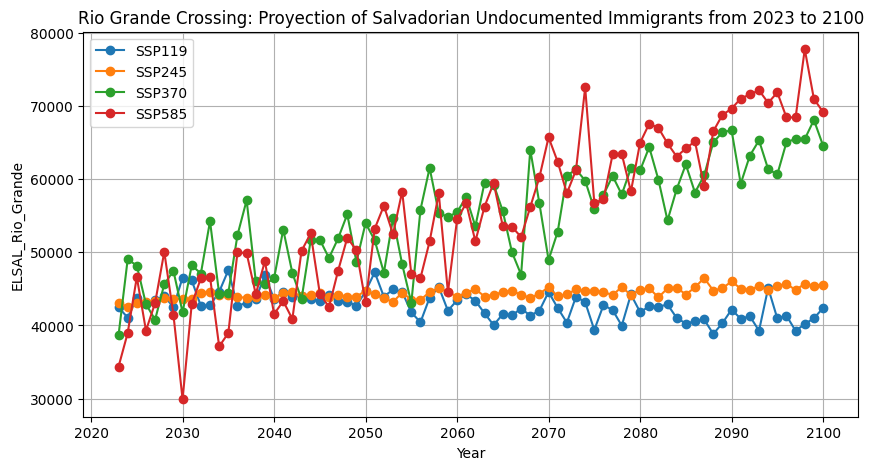

In [30]:
# Setting the index of all DataFrames to 'Year'
final_predictions_2023_2100_ssp119_ELSAL.set_index('Year', inplace=True)
final_predictions_2023_2100_ssp245_ELSAL.set_index('Year', inplace=True)
final_predictions_2023_2100_ssp370_ELSAL.set_index('Year', inplace=True)
final_predictions_2023_2100_ssp585_ELSAL.set_index('Year', inplace=True)
###########
# Plotting
plt.figure(figsize=(10, 5))  # You can adjust the figure size as needed
for ssp, label in zip([final_predictions_2023_2100_ssp119_ELSAL, final_predictions_2023_2100_ssp245_ELSAL, final_predictions_2023_2100_ssp370_ELSAL, final_predictions_2023_2100_ssp585_ELSAL], ['SSP119', 'SSP245', 'SSP370', 'SSP585']):
    plt.plot(ssp.index, ssp['ELSAL_Rio_Grande'], marker='o', linestyle='-', label=label)
###########
plt.title('Rio Grande Crossing: Proyection of Salvadorian Undocumented Immigrants from 2023 to 2100')
plt.xlabel('Year')
plt.ylabel('ELSAL_Rio_Grande')
plt.grid(True)
plt.legend()

plt.savefig("All_outputs/El_Salvador/Rio_Grande_ELSAL_All_Projections.png")

plt.show()

In [31]:
# Function to extract data for each scenario
def extract_data(final_predictions, scenario):
    return pd.DataFrame({
        'Scenario': [scenario] * len(final_predictions),
        'Year': final_predictions.index,
        'Number_of_People': final_predictions['ELSAL_Rio_Grande']
    })
# Extract data for each scenario
data_ssp119_ELSAL = extract_data(final_predictions_2023_2100_ssp119_ELSAL, 'SSP119')
data_ssp245_ELSAL = extract_data(final_predictions_2023_2100_ssp245_ELSAL, 'SSP245')
data_ssp370_ELSAL = extract_data(final_predictions_2023_2100_ssp370_ELSAL, 'SSP370')
data_ssp585_ELSAL = extract_data(final_predictions_2023_2100_ssp585_ELSAL, 'SSP585')
# Concatenating all scenarios into a single DataFrame
output_df_ELSAL = pd.concat([data_ssp119_ELSAL, data_ssp245_ELSAL, data_ssp370_ELSAL, data_ssp585_ELSAL], ignore_index=True)
# Pivot the DataFrame
output_df_pivoted_ELSAL = output_df_ELSAL.pivot(index='Scenario', columns='Year', values='Number_of_People')
# Fill any missing values with 0
output_df_pivoted_ELSAL.fillna(0, inplace=True)

# Reformatting dataframe
output_df_pivoted_ELSAL.insert(0, 'Crossing', 'Rio_Grande_Crossing')
output_df_pivoted_ELSAL.insert(1, 'Country', 'ELSAL')

# Saving dataframe

output_df_pivoted_ELSAL.to_csv("All_outputs/El_Salvador/Rio_Grande_ELSAL_4SSP.csv", index=True)

# Printing
output_df_pivoted_ELSAL

Year,Crossing,Country,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Scenario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SSP119,Rio_Grande_Crossing,ELSAL,42489.77,41069.74,43733.20,42934.18,43491.43,43990.26,42510.89,46524.50,46155.34,42670.62,42731.77,44590.34,47541.38,42666.46,43095.90,43612.16,46898.46,43594.74,44603.26,43907.89,44036.26,43587.92,43329.02,44174.33,43320.37,43269.05,42703.19,44643.18,47260.43,43922.81,44920.88,44585.01,41781.26,40440.29,43793.08,45250.80,42019.31,43438.52,44256.42,43372.68,41660.02,40050.31,41556.73,41384.76,42304.80,41352.08,42023.95,44569.28,42381.16,40385.73,43936.81,43175.07,39381.93,42776.62,42106.22,39973.81,44235.07,41836.42,42593.87,42558.91,42863.21,41027.81,40264.07,40562.87,40821.16,38839.07,40314.57,42168.28,40917.66,41262.47,39275.24,45117.28,40953.39,41331.12,39262.26,40191.49,40979.04,42381.85
SSP245,Rio_Grande_Crossing,ELSAL,43027.91,42584.42,43047.63,43245.15,43401.12,43783.08,43609.98,43628.60,43642.67,44383.06,44613.82,44211.26,44208.06,43923.89,43744.65,43949.32,44155.07,43739.51,44372.49,44567.89,43965.44,44099.52,44389.96,43916.09,44218.88,43924.32,43915.64,44759.13,44232.57,43715.76,43213.45,44491.38,43522.30,43468.41,44588.22,45098.71,44606.20,43920.55,44427.55,44977.76,43953.32,44204.84,44543.54,44753.98,44171.11,43783.28,44323.36,45239.48,43963.15,44234.41,44920.55,44699.24,44641.46,44557.31,44155.92,45250.44,44154.52,44907.49,45079.33,43838.77,45062.39,45172.12,44223.32,45196.53,46484.95,44766.71,45091.30,46003.49,45042.50,44843.24,45404.39,44814.91,45378.76,45721.74,44806.04,45721.22,45425.37,45582.33
SSP370,Rio_Grande_Crossing,ELSAL,38651.42,49030.23,48174.13,42906.28,40786.17,45631.11,47452.49,41805.43,48214.72,47089.88,54234.26,44288.14,44434.35,52335.70,57094.83,46045.30,45626.79,46417.20,53101.81,47156.20,43583.55,51625.36,51711.66,49206.21,51886.58,55173.76,48677.33,53975.71,51631.73,47201.33,54617.20,48367.69,43067.62,55805.32,61510.68,55366.74,54815.43,55466.89,57529.67,53527.43,59492.62,59247.61,55594.84,49998.53,46936.91,64001.36,56654.03,48940.68,52801.65,60455.99,61305.94,59783.39,55869.19,57853.82,60405.02,57883.81,61474.09,61166.50,64348.38,59926.35,54337.06,58605.46,61987.00,58150.68,60481.31,64998.94,66385.39,66651.68,59356.70,63194.08,65272.44,61338.03,60624.27,65019.33,65477.71,65452.21,68056.73,64566.51
SSP585,Rio_Grande_Crossing,ELSAL,34358.45,38960.39,46604.47,39295.84,43081.16,50052.68,41479.46,29925.39,42898.10,46435.87,46635.93,37126.41,38969.74,49989.21,49879.99,44277.04,48782.38,41548.65,43324.16,40876.28,50172.74,52563.57,44354.52,42514.86,47475.01,51972.81,50264.85,43137.97,53206.19,56347.73,52470.95,58288.56,47024.43,46476.69,51473.96,58023.73,44530.94,54469.37,56701.39,51489.95,56221.56,59466.69,53524.10,53458.62,52082.67,56172.66,60238.13,65691.45,62342.03,58049.11,61230.36,72511.88,56728.01,57213.06,63365.04,63415.85,58299.22,64943.69,67541.68,66990.79,64862.66,63063.38,64174.43,65137.70,58979.28,66508.08,68753.15,69596.86,70989.65,71544.43,72111.81,70398.68,71820.15,68402.34,68417.73,77722.18,70926.06,69157.38


# Final Plots

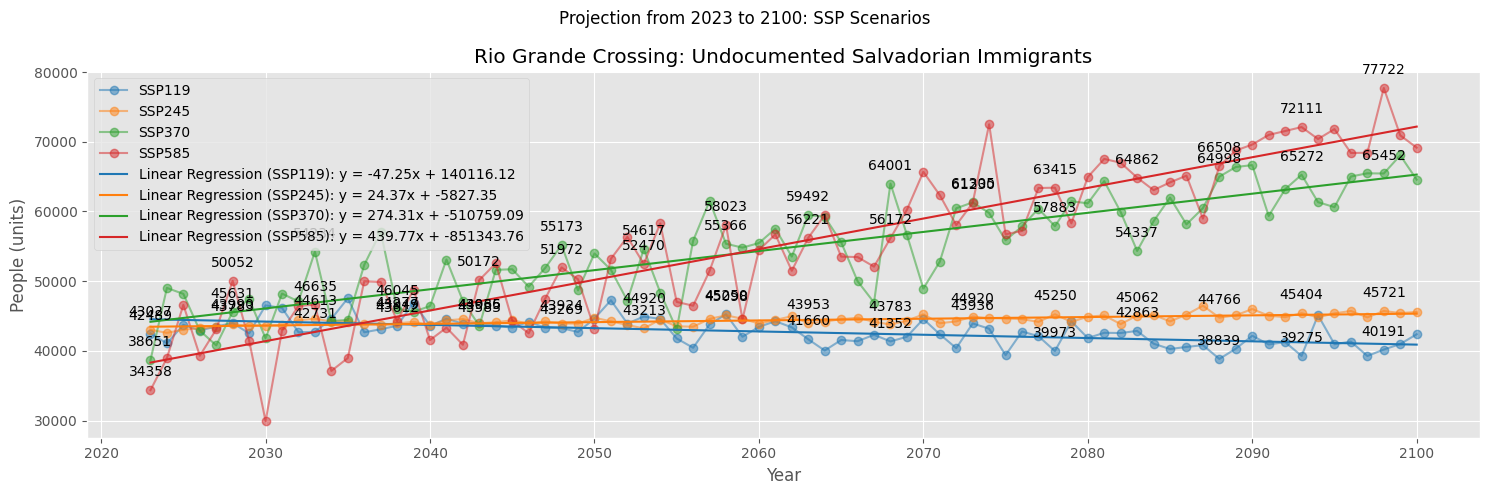

In [32]:
# Plotting results

##################################################################
# Using ggplot
plt.style.use('ggplot')
##################################################################
# Color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
##################################################################
# Plot size
plt.figure(figsize=(15, 5))  # You can adjust the figure size as needed
##################################################################
# Convert index values to strings
output_df_pivoted_ELSAL.index = output_df_pivoted_ELSAL.index.astype(str)
##################################################################
# Selecting every 5th year to display
years_to_display = output_df_pivoted_ELSAL.columns[2:][::5]  # Excluding first two columns
##################################################################
# Plotting data for each scenario
for scenario, color in zip(output_df_pivoted_ELSAL.index, colors):
    plt.plot(output_df_pivoted_ELSAL.columns[2:].astype(int), output_df_pivoted_ELSAL.loc[scenario][2:], marker='o', linestyle='-', alpha=0.5, label=scenario, color=color)
    for year in years_to_display:
        plt.annotate(f'{int(output_df_pivoted_ELSAL.loc[scenario, year])}', (int(year), output_df_pivoted_ELSAL.loc[scenario, year]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Rio Grande Crossing: Undocumented Salvadorian Immigrants')
plt.suptitle('Projection from 2023 to 2100: SSP Scenarios')
plt.xlabel('Year')
plt.ylabel('People (units)')
##################################################################
# Linear Regression Equation
X = output_df_pivoted_ELSAL.columns[2:].astype(int).values.reshape(-1, 1)
for scenario, color in zip(output_df_pivoted_ELSAL.index, colors):
    y = output_df_pivoted_ELSAL.loc[scenario][2:].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    m = model.coef_[0][0]
    b = model.intercept_[0]
    plt.plot(output_df_pivoted_ELSAL.columns[2:].astype(int), m * output_df_pivoted_ELSAL.columns[2:].astype(int) + b, label=f'Linear Regression ({scenario}): y = {m:.2f}x + {b:.2f}', color=color)
plt.grid(True)
plt.legend()
plt.tight_layout()
##################################################################

# Saving graph
plt.savefig("All_outputs/El_Salvador/Rio_Grande_ELSAL_4SSP_Single.png")

plt.show()